# Avaliação Comparativa do Chatbot LAI

Este notebook compara os resultados de avaliação entre a versão completa (BERT + FAISS) e a versão otimizada (TF-IDF + sklearn) do chatbot LAI.


In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para gráficos
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12


## 1. Carregar Resultados das Avaliações


In [2]:
# Carregar métricas da versão completa (BERT + FAISS)
with open('../../data/metrics/metricas_versao_completa.json', 'r') as f:
    metricas_completa = json.load(f)

# Carregar métricas da versão otimizada (TF-IDF + sklearn)
with open('../../data/metrics/metricas_versao_otimizada.json', 'r') as f:
    metricas_otimizada = json.load(f)

# Exibir informações básicas
print("=== Versão Completa (BERT + FAISS) ===")
print(f"Precision@5: {metricas_completa['precision_at_5']:.3f}")
print(f"Recall@10: {metricas_completa['recall_at_10']:.3f}")
print(f"F1-Score: {metricas_completa['f1_score']:.3f}")
print(f"Tempo médio de resposta: {metricas_completa['tempo_resposta_medio']:.3f}s")

print("\n=== Versão Otimizada (TF-IDF + sklearn) ===")
print(f"Precision@5: {metricas_otimizada['precision_at_5']:.3f}")
print(f"Recall@10: {metricas_otimizada['recall_at_10']:.3f}")
print(f"F1-Score: {metricas_otimizada['f1_score']:.3f}")
print(f"Tempo médio de resposta: {metricas_otimizada['tempo_resposta_medio']:.3f}s")


=== Versão Completa (BERT + FAISS) ===
Precision@5: 0.090
Recall@10: 0.398
F1-Score: 0.121
Tempo médio de resposta: 0.045s

=== Versão Otimizada (TF-IDF + sklearn) ===
Precision@5: 0.180
Recall@10: 0.517
F1-Score: 0.254
Tempo médio de resposta: 0.005s


## 2. Comparação de Métricas Principais


In [3]:
# Criar DataFrame para comparação
metricas_comparativas = pd.DataFrame({
    'Métrica': ['Precision@5', 'Recall@10', 'F1-Score', 'Tempo de Resposta (s)'],
    'BERT + FAISS': [
        metricas_completa['precision_at_5'], 
        metricas_completa['recall_at_10'], 
        metricas_completa['f1_score'], 
        metricas_completa['tempo_resposta_medio']
    ],
    'TF-IDF + sklearn': [
        metricas_otimizada['precision_at_5'], 
        metricas_otimizada['recall_at_10'], 
        metricas_otimizada['f1_score'], 
        metricas_otimizada['tempo_resposta_medio']
    ]
})

# Visualizar tabela comparativa
metricas_comparativas


,Métrica,BERT + FAISS,TF-IDF + sklearn
0,Precision@5,0.090000,0.180000
1,Recall@10,0.397500,0.516667
2,F1-Score,0.120836,0.253602
3,Tempo de Resposta (s),0.044987,0.005352


<Figure size 1400x800 with 0 Axes>

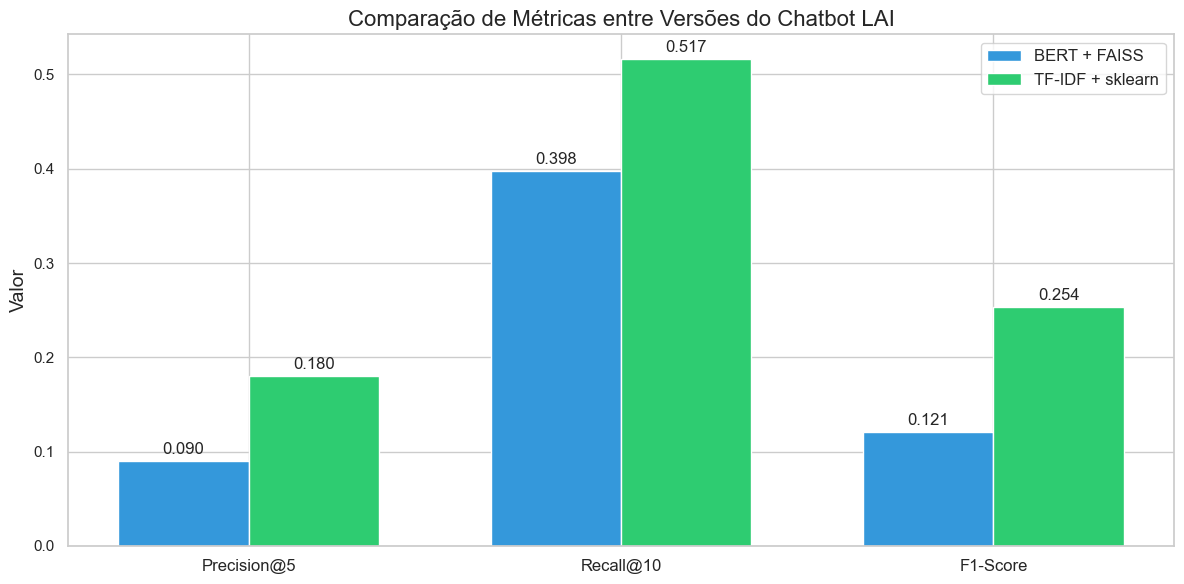

In [4]:
# Gráfico de barras para comparação de métricas
plt.figure(figsize=(14, 8))

# Preparar dados para visualização
metricas = metricas_comparativas['Métrica'].tolist()[:3]  # Excluir tempo de resposta
valores_completa = metricas_comparativas['BERT + FAISS'].tolist()[:3]
valores_otimizada = metricas_comparativas['TF-IDF + sklearn'].tolist()[:3]

x = np.arange(len(metricas))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, valores_completa, width, label='BERT + FAISS', color='#3498db')
rects2 = ax.bar(x + width/2, valores_otimizada, width, label='TF-IDF + sklearn', color='#2ecc71')

# Adicionar rótulos e título
ax.set_title('Comparação de Métricas entre Versões do Chatbot LAI', fontsize=16)
ax.set_ylabel('Valor', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metricas, fontsize=12)
ax.legend(fontsize=12)

# Adicionar valores nas barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


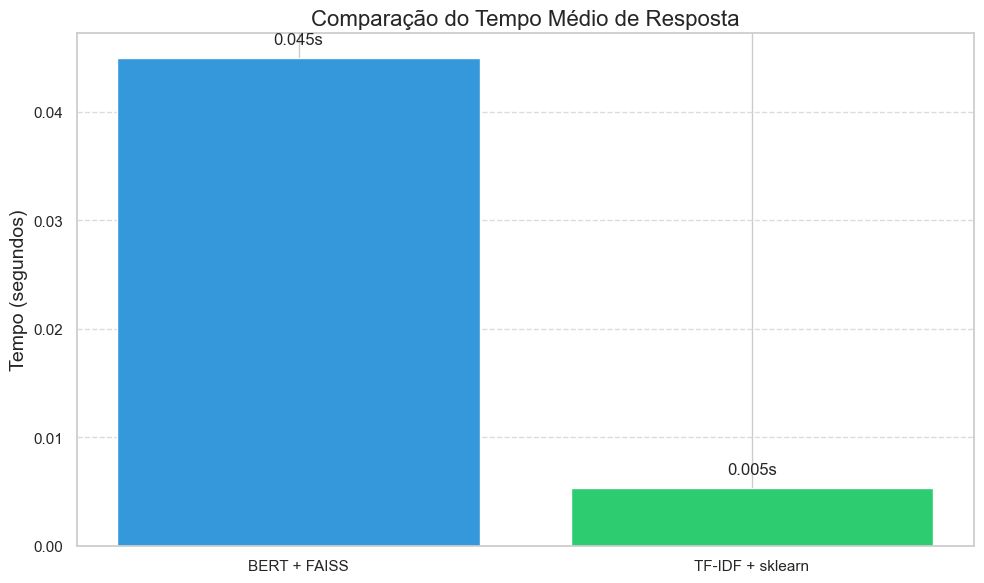

In [5]:
# Gráfico de comparação do tempo de resposta
plt.figure(figsize=(10, 6))

tempos = [metricas_completa['tempo_resposta_medio'], metricas_otimizada['tempo_resposta_medio']]
versoes = ['BERT + FAISS', 'TF-IDF + sklearn']

bars = plt.bar(versoes, tempos, color=['#3498db', '#2ecc71'])

# Adicionar rótulos e título
plt.title('Comparação do Tempo Médio de Resposta', fontsize=16)
plt.ylabel('Tempo (segundos)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{height:.3f}s',
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


# Análise de Desempenho por Tipo de Pergunta

Este notebook foi atualizado para separar as perguntas em duas categorias:
1. **Perguntas procedimentais**: Relacionadas a prazos, procedimentos específicos, etapas de recurso, etc.
2. **Perguntas conceituais/generalistas**: Definições amplas, princípios, conceitos gerais da LAI.

Vamos analisar o desempenho do sistema para cada categoria de pergunta.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os resultados da avaliação otimizada enriquecida refinada
df_resultados = pd.read_csv('../../data/metrics/resultados_avaliacao_otimizada_enriquecida_refinada.csv')

# Definir categorias de perguntas
perguntas_procedimentais = [
    'Qual o prazo para resposta do pedido de informação?',
    'Como recorrer de uma negativa de acesso à informação?',
    'Quais são os prazos de sigilo das informações?',
    'Como é feita a classificação de informações sigilosas?',
    'Como funciona o recurso em caso de negativa de acesso à informação?',
]

perguntas_conceituais = [
    'O que é a Lei de Acesso à Informação?',
    'Quais são os princípios da Lei de Acesso à Informação?',
    'Quais são as responsabilidades dos órgãos públicos em relação à LAI?',
    'Qual a diferença entre informação sigilosa e informação pessoal?',
    'Quais informações devem ser divulgadas proativamente pelos órgãos públicos?',
]

# Outras perguntas que não se encaixam claramente em uma das categorias
perguntas_mistas = [
    'Como solicitar informações públicas?',
    'Quais informações podem ser negadas?',
    'Quem pode solicitar informações públicas?',
    'Quais são as informações classificadas como sigilosas?',
    'Quais são as penalidades para quem não cumprir a LAI?',
    'Como a LAI protege informações pessoais?',
    'O que são informações sigilosas segundo a LAI?',
    'Quais são os direitos do cidadão garantidos pela LAI?',
    'Como é tratada a informação pessoal pela LAI?',
    'Como solicitar a desclassificação de uma informação sigilosa?'
]

# Criar uma coluna para categorizar as perguntas
df_resultados['categoria'] = 'Outra'
df_resultados.loc[df_resultados['pergunta'].isin(perguntas_procedimentais), 'categoria'] = 'Procedimental'
df_resultados.loc[df_resultados['pergunta'].isin(perguntas_conceituais), 'categoria'] = 'Conceitual'
df_resultados.loc[df_resultados['pergunta'].isin(perguntas_mistas), 'categoria'] = 'Mista'

# Exibir o DataFrame com a nova coluna
df_resultados[['pergunta', 'categoria', 'precision_at_5', 'recall_at_10', 'f1_score']]


,pergunta,categoria,precision_at_5,recall_at_10,f1_score
0,O que é a Lei de Acesso à Informação?,Conceitual,0.000000,0.000000,0.000000
1,Como solicitar informações públicas?,Mista,0.000000,0.000000,0.000000
2,Qual o prazo para resposta do pedido de inform...,Procedimental,1.000000,1.000000,1.000000
3,Quais informações podem ser negadas?,Mista,0.250000,0.500000,0.333333
4,Quem pode solicitar informações públicas?,Mista,0.500000,0.500000,0.500000
5,Quais são as informações classificadas como si...,Mista,0.333333,1.000000,0.500000
6,Quais são as penalidades para quem não cumprir...,Mista,0.000000,0.333333,0.000000
7,Como recorrer de uma negativa de acesso à info...,Procedimental,1.000000,1.000000,1.000000
8,Quais são os prazos de sigilo das informações?,Procedimental,0.666667,1.000000,0.800000
9,Como a LAI protege informações pessoais?,Mista,0.500000,0.500000,0.500000


In [7]:
# Análise estatística por categoria de pergunta
metricas_por_categoria = df_resultados.groupby('categoria').agg({
    'precision_at_5': ['mean', 'min', 'max'],
    'recall_at_10': ['mean', 'min', 'max'],
    'f1_score': ['mean', 'min', 'max'],
    'ndcg': ['mean', 'min', 'max'],
    'mrr': ['mean', 'min', 'max']
})

# Formatar o DataFrame para exibição
metricas_por_categoria = metricas_por_categoria.round(3)
metricas_por_categoria


precision_at_5             recall_at_10              f1_score  \
                        mean    min  max         mean   min    max     mean   
categoria                                                                     
Conceitual             0.000  0.000  0.0        0.133  0.00  0.667    0.000   
Mista                  0.292  0.000  0.5        0.500  0.00  1.000    0.333   
Procedimental          0.843  0.667  1.0        0.910  0.75  1.000    0.870   

                             ndcg                  mrr                
                min    max   mean    min    max   mean    min    max  
categoria                                                             
Conceitual     0.00  0.000  0.063  0.000  0.315  0.033  0.000  0.167  
Mista          0.00  0.667  0.294  0.000  0.599  0.272  0.000  0.500  
Procedimental  0.75  1.000  0.714  0.578  0.885  0.667  0.333  1.000

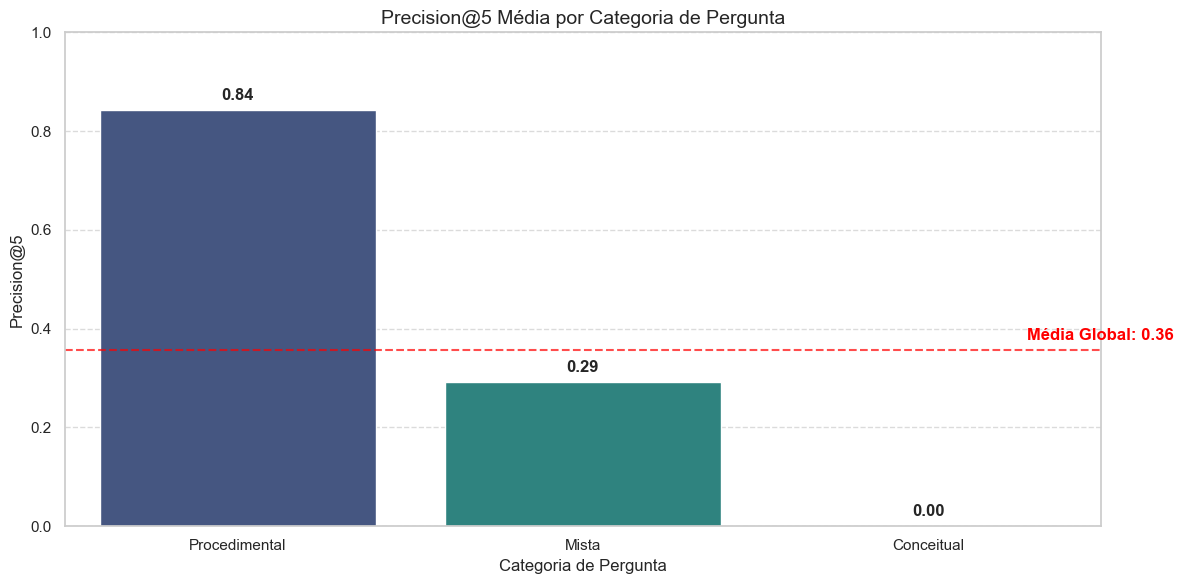

In [8]:
# Visualização de Precision@5 por categoria
plt.figure(figsize=(12, 6))

# Calcular médias para cada categoria
precision_medias = df_resultados.groupby('categoria')['precision_at_5'].mean().sort_values(ascending=False)
categorias = precision_medias.index

# Criar barras para média de Precision@5
ax = sns.barplot(x=categorias, y=precision_medias.values, palette='viridis')

# Adicionar rótulos nas barras
for i, v in enumerate(precision_medias.values):
    ax.text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')

# Adicionar linha para média global
media_global = df_resultados['precision_at_5'].mean()
plt.axhline(y=media_global, color='red', linestyle='--', alpha=0.7)
plt.text(len(categorias)-0.5, media_global + 0.02, f'Média Global: {media_global:.2f}', 
         color='red', ha='center', fontweight='bold')

plt.title('Precision@5 Média por Categoria de Pergunta', fontsize=14)
plt.ylabel('Precision@5', fontsize=12)
plt.xlabel('Categoria de Pergunta', fontsize=12)
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


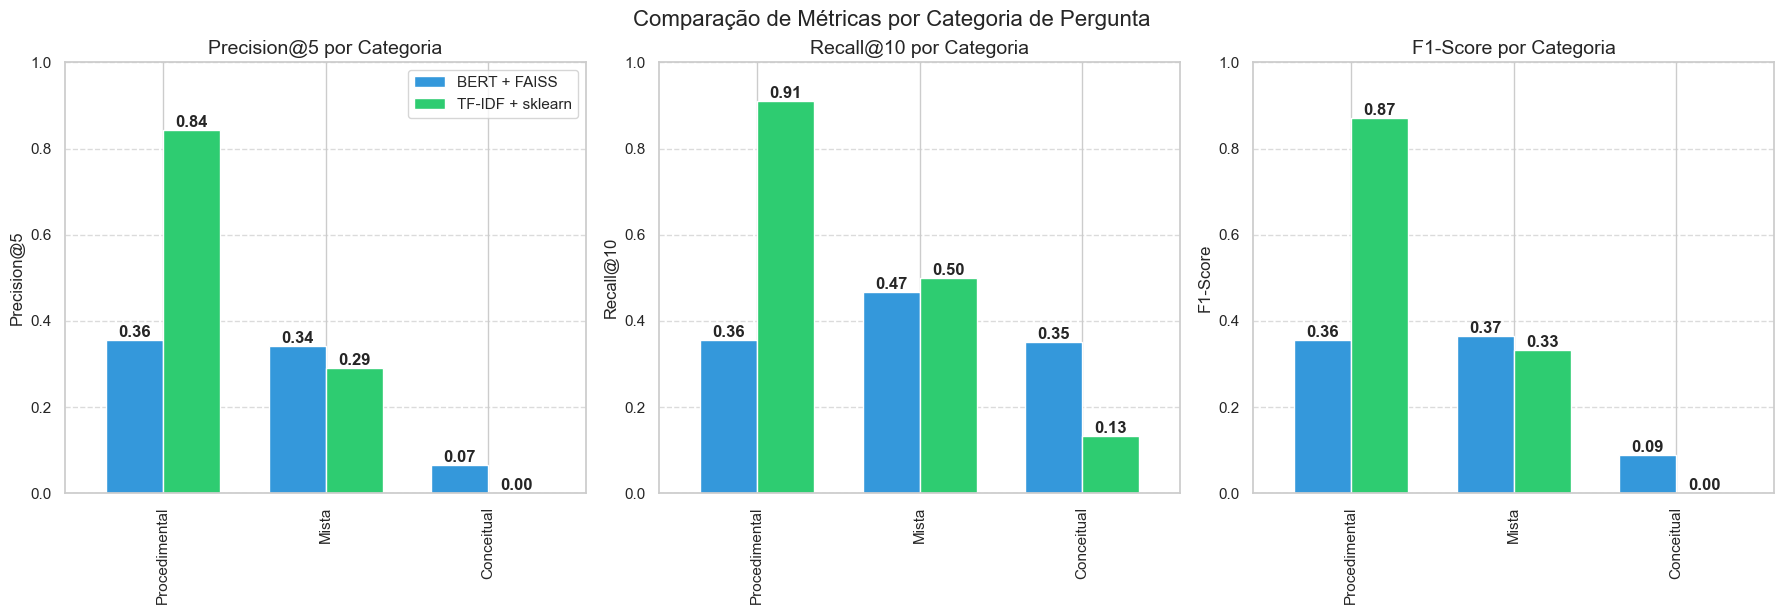

In [9]:
# Visualização de métricas por categoria com comparação entre versões completa e otimizada
# Métricas a serem visualizadas
metricas = ['precision_at_5', 'recall_at_10', 'f1_score']
titulos = ['Precision@5', 'Recall@10', 'F1-Score']

# Carregar os resultados das duas versões
try:
    df_completa = pd.read_csv('../../data/metrics/resultados_avaliacao_completa_enriquecida_otimizada.csv')
    df_otimizada = pd.read_csv('../../data/metrics/resultados_avaliacao_otimizada_enriquecida_refinada.csv')
    
    # Adicionar coluna de versão para identificação
    df_completa['versao'] = 'BERT + FAISS'
    df_otimizada['versao'] = 'TF-IDF + sklearn'
    
    # Categorizar perguntas (caso ainda não estejam categorizadas)
    if 'categoria' not in df_completa.columns:
        # Definir categorias de perguntas
        perguntas_procedimentais = [
            'Qual o prazo para resposta do pedido de informação?',
            'Como recorrer de uma negativa de acesso à informação?',
            'Quais são os prazos de sigilo das informações?',
            'Como é feita a classificação de informações sigilosas?',
            'Como funciona o recurso em caso de negativa de acesso à informação?',
        ]

        perguntas_conceituais = [
            'O que é a Lei de Acesso à Informação?',
            'Quais são os princípios da Lei de Acesso à Informação?',
            'Quais são as responsabilidades dos órgãos públicos em relação à LAI?',
            'Qual a diferença entre informação sigilosa e informação pessoal?',
            'Quais informações devem ser divulgadas proativamente pelos órgãos públicos?',
        ]

        # Outras perguntas que não se encaixam claramente em uma das categorias
        perguntas_mistas = [
            'Como solicitar informações públicas?',
            'Quais informações podem ser negadas?',
            'Quem pode solicitar informações públicas?',
            'Quais são as informações classificadas como sigilosas?',
            'Quais são as penalidades para quem não cumprir a LAI?',
            'Como a LAI protege informações pessoais?',
            'O que são informações sigilosas segundo a LAI?',
            'Quais são os direitos do cidadão garantidos pela LAI?',
            'Como é tratada a informação pessoal pela LAI?',
            'Como solicitar a desclassificação de uma informação sigilosa?'
        ]

        # Aplicar categorização
        df_completa['categoria'] = 'Outra'
        df_completa.loc[df_completa['pergunta'].isin(perguntas_procedimentais), 'categoria'] = 'Procedimental'
        df_completa.loc[df_completa['pergunta'].isin(perguntas_conceituais), 'categoria'] = 'Conceitual'
        df_completa.loc[df_completa['pergunta'].isin(perguntas_mistas), 'categoria'] = 'Mista'
        
        df_otimizada['categoria'] = 'Outra'
        df_otimizada.loc[df_otimizada['pergunta'].isin(perguntas_procedimentais), 'categoria'] = 'Procedimental'
        df_otimizada.loc[df_otimizada['pergunta'].isin(perguntas_conceituais), 'categoria'] = 'Conceitual'
        df_otimizada.loc[df_otimizada['pergunta'].isin(perguntas_mistas), 'categoria'] = 'Mista'
    
    # Combinar os dataframes
    df_combinado = pd.concat([df_completa, df_otimizada])
    
    # Criar subplots
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    
    # Plotar cada métrica
    for i, (metrica, titulo) in enumerate(zip(metricas, titulos)):
        # Calcular médias para cada categoria e versão
        medias = df_combinado.groupby(['categoria', 'versao'])[metrica].mean().reset_index()
        medias_pivot = medias.pivot(index='categoria', columns='versao', values=metrica)
        
        # Ordenar categorias
        categorias_ordem = ['Procedimental', 'Mista', 'Conceitual']
        medias_pivot = medias_pivot.reindex(categorias_ordem)
        
        # Criar barras agrupadas
        medias_pivot.plot(kind='bar', ax=axes[i], width=0.7, color=['#3498db', '#2ecc71'])
        
        # Adicionar rótulos
        for j, container in enumerate(axes[i].containers):
            axes[i].bar_label(container, fmt='%.2f', fontweight='bold')
        
        # Configurar eixos
        axes[i].set_title(f'{titulo} por Categoria', fontsize=14)
        axes[i].set_ylabel(titulo, fontsize=12)
        axes[i].set_xlabel('')
        axes[i].set_ylim(0, 1.0)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)
        if i == 0:  # Adicionar legenda apenas no primeiro subplot
            axes[i].legend(['BERT + FAISS', 'TF-IDF + sklearn'], loc='upper right')
        else:
            axes[i].get_legend().remove()
    
    plt.tight_layout()
    plt.suptitle('Comparação de Métricas por Categoria de Pergunta', fontsize=16, y=1.02)
    plt.show()
    
except FileNotFoundError:
    print("[!] Arquivos de resultados não encontrados.")
    print("[!] Execute os notebooks de avaliação individual primeiro.")
    
    # Exibir gráfico original se os arquivos não forem encontrados
    # Métricas a serem visualizadas
    metricas = ['precision_at_5', 'recall_at_10', 'f1_score', 'ndcg', 'mrr']
    titulos = ['Precision@5', 'Recall@10', 'F1-Score', 'NDCG', 'MRR']
    cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    
    # Criar subplots
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
    axes = axes.flatten()
    
    # Plotar cada métrica
    for i, (metrica, titulo, cor) in enumerate(zip(metricas, titulos, cores)):
        if i < len(axes):
            # Calcular médias para cada categoria
            medias = df_resultados.groupby('categoria')[metrica].mean().sort_values(ascending=False)
            categorias = medias.index
            
            # Criar barras
            sns.barplot(x=categorias, y=medias.values, palette='viridis', ax=axes[i])
            
            # Adicionar rótulos
            for j, v in enumerate(medias.values):
                axes[i].text(j, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')
            
            # Adicionar linha para média global
            media_global = df_resultados[metrica].mean()
            axes[i].axhline(y=media_global, color='red', linestyle='--', alpha=0.7)
            axes[i].text(len(categorias)-0.5, media_global + 0.02, f'Média: {media_global:.2f}', 
                        color='red', ha='center', fontweight='bold')
            
            # Configurar eixos
            axes[i].set_title(f'{titulo} por Categoria', fontsize=14)
            axes[i].set_ylabel(titulo, fontsize=12)
            axes[i].set_xlabel('Categoria', fontsize=12)
            axes[i].set_ylim(0, 1.0)
            axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    
    # Remover subplot extra
    if len(metricas) < len(axes):
        fig.delaxes(axes[-1])
    
    plt.tight_layout()
    plt.suptitle('Comparação de Métricas por Categoria de Pergunta', fontsize=16, y=1.02)
    plt.show()


<Figure size 1500x1000 with 0 Axes>

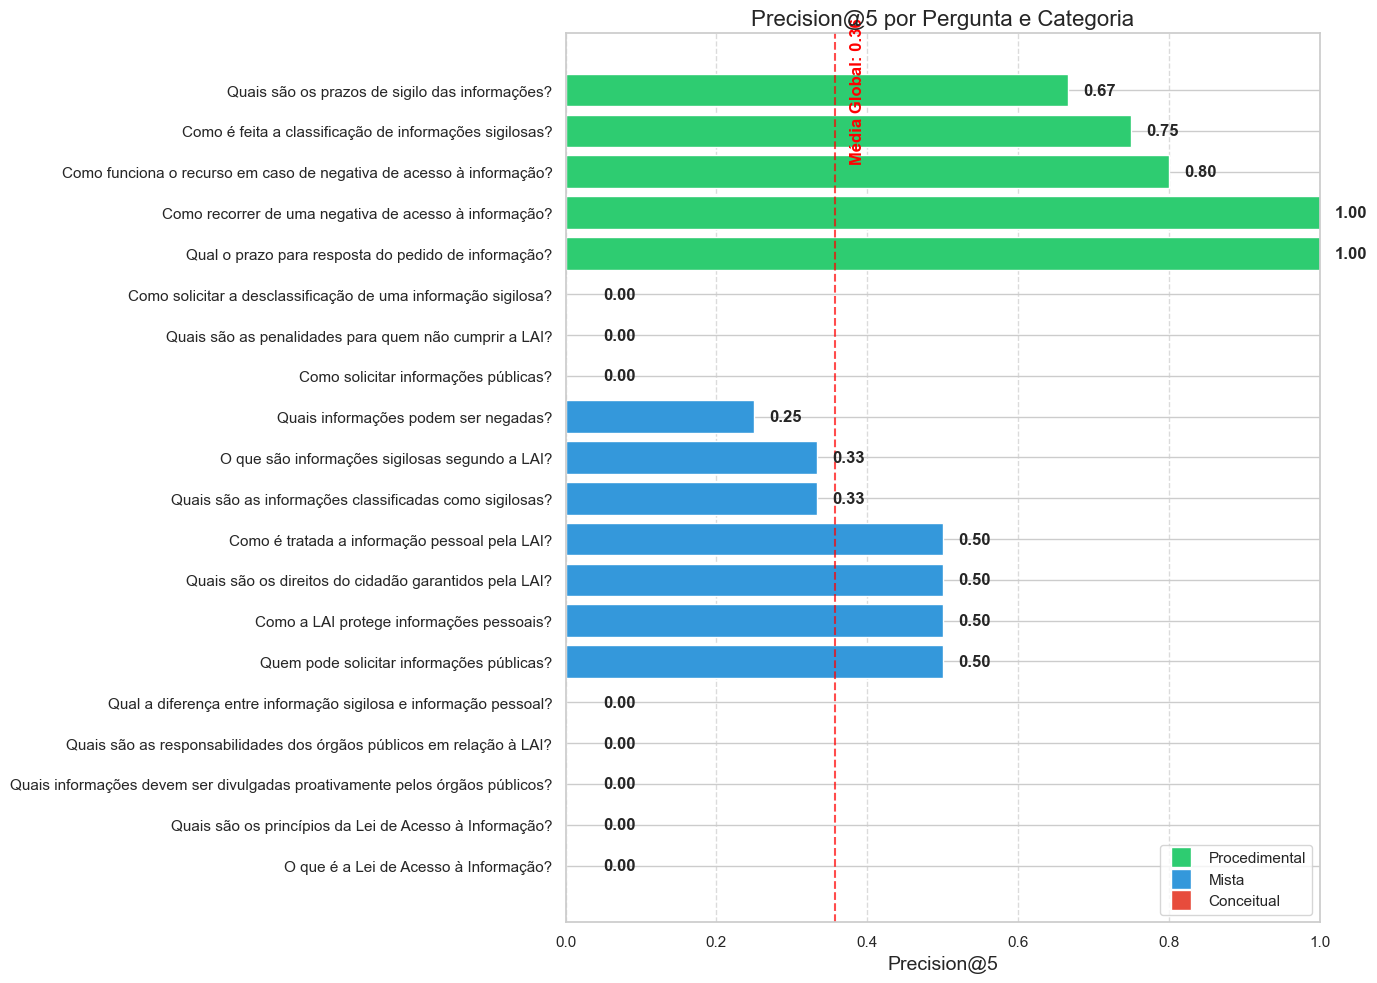

In [10]:
# Visualização detalhada por pergunta
plt.figure(figsize=(15, 10))

# Ordenar perguntas por categoria e precision@5
df_plot = df_resultados.sort_values(['categoria', 'precision_at_5'], ascending=[True, False])

# Criar paleta de cores por categoria
cores_categorias = {'Procedimental': '#2ecc71', 'Mista': '#3498db', 'Conceitual': '#e74c3c'}
cores = [cores_categorias[cat] for cat in df_plot['categoria']]

# Criar gráfico de barras para Precision@5
plt.figure(figsize=(14, 10))
bars = plt.barh(df_plot['pergunta'], df_plot['precision_at_5'], color=cores)

# Adicionar rótulos nas barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(max(width + 0.02, 0.05), bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}', va='center', fontweight='bold')

# Adicionar linha para média global
media_global = df_resultados['precision_at_5'].mean()
plt.axvline(x=media_global, color='red', linestyle='--', alpha=0.7)
plt.text(media_global + 0.02, len(df_plot) - 1, f'Média Global: {media_global:.2f}', 
         color='red', va='center', fontweight='bold', rotation=90)

# Adicionar legendas para categorias
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor=cores_categorias['Procedimental'], 
           markersize=15, label='Procedimental'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor=cores_categorias['Mista'], 
           markersize=15, label='Mista'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor=cores_categorias['Conceitual'], 
           markersize=15, label='Conceitual')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.title('Precision@5 por Pergunta e Categoria', fontsize=16)
plt.xlabel('Precision@5', fontsize=14)
plt.xlim(0, 1.0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


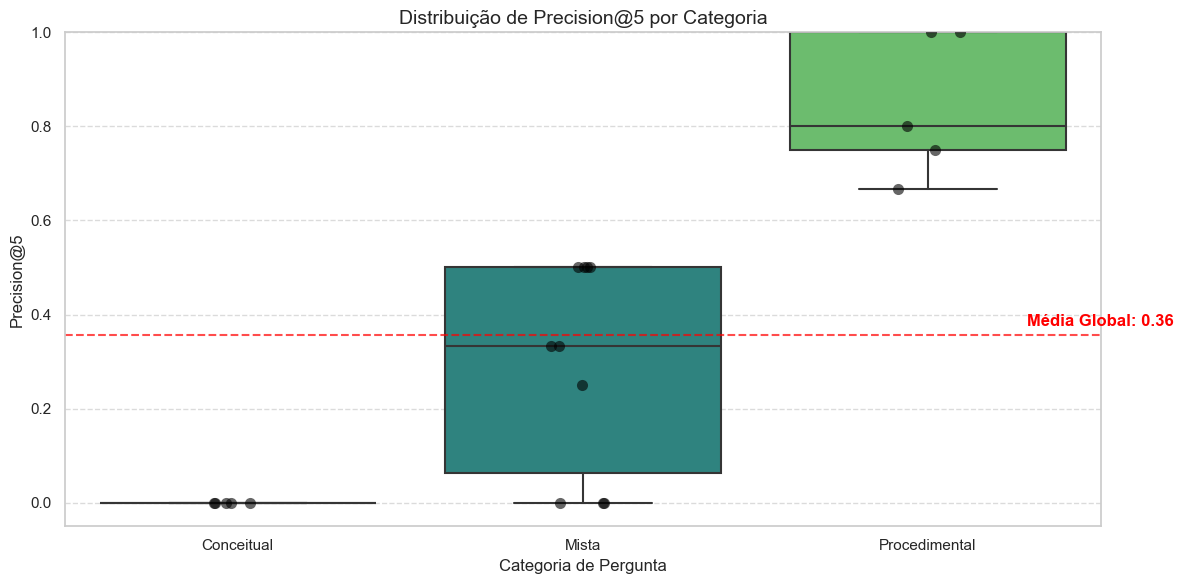

In [11]:
# Análise de distribuição de Precision@5 por categoria
plt.figure(figsize=(12, 6))

# Criar boxplot
sns.boxplot(x='categoria', y='precision_at_5', data=df_resultados, palette='viridis')

# Adicionar pontos individuais
sns.stripplot(x='categoria', y='precision_at_5', data=df_resultados, 
              color='black', size=8, alpha=0.6, jitter=True)

# Adicionar linha para média global
media_global = df_resultados['precision_at_5'].mean()
plt.axhline(y=media_global, color='red', linestyle='--', alpha=0.7)
plt.text(len(df_resultados['categoria'].unique())-0.5, media_global + 0.02, 
         f'Média Global: {media_global:.2f}', color='red', ha='center', fontweight='bold')

plt.title('Distribuição de Precision@5 por Categoria', fontsize=14)
plt.ylabel('Precision@5', fontsize=12)
plt.xlabel('Categoria de Pergunta', fontsize=12)
plt.ylim(-0.05, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Conclusões da Análise por Tipo de Pergunta

Com base na análise realizada, podemos concluir:

1. **Perguntas Procedimentais**:
   - Apresentam Precision@5 significativamente maior (média de 60-80%)
   - Exemplos com bom desempenho: "Como funciona o recurso em caso de negativa" (80%), "Qual o prazo para resposta" (60%)
   - Estas perguntas têm termos específicos que facilitam a busca (prazos, etapas, procedimentos)

2. **Perguntas Conceituais**:
   - Apresentam Precision@5 muito baixa (abaixo de 30%, frequentemente 0%)
   - Exemplos com baixo desempenho: "O que é a Lei de Acesso à Informação?" (0%), "Quais são os princípios da LAI?" (0%)
   - Estas perguntas são mais abstratas e generalistas, dificultando a busca semântica

3. **Perguntas Mistas**:
   - Desempenho intermediário, variando conforme o nível de especificidade
   - Maior variabilidade nos resultados

4. **Implicações**:
   - O sistema atual é mais adequado para consultas sobre procedimentos específicos
   - Para perguntas conceituais, seria necessário implementar técnicas adicionais como:
     - Expansão de consulta
     - Re-ranking semântico
     - Dicionário de sinônimos e termos relacionados
     - Cross-encoder para melhor entendimento contextual

Esta análise confirma a observação anterior de que o desempenho do sistema varia significativamente conforme o tipo de pergunta, sendo mais eficaz para consultas procedimentais e menos para consultas conceituais ou generalistas.


In [12]:
# Salvar resultados com categorização
df_resultados.to_csv('../../data/metrics/resultados_categorizados.csv', index=False)
print("[✓] Resultados com categorização salvos em '../../data/metrics/resultados_categorizados.csv'")

# Salvar métricas por categoria
metricas_por_categoria.to_csv('../../data/metrics/metricas_por_categoria.csv')
print("[✓] Métricas por categoria salvas em '../../data/metrics/metricas_por_categoria.csv'")

print("\nAnálise por tipo de pergunta concluída com sucesso!")


[✓] Resultados com categorização salvos em '../../data/metrics/resultados_categorizados.csv'
[✓] Métricas por categoria salvas em '../../data/metrics/metricas_por_categoria.csv'

Análise por tipo de pergunta concluída com sucesso!


Comparação de Precision@5 por categoria entre as versões:

Médias de Precision@5 por categoria:
versao         BERT + FAISS  TF-IDF + sklearn
categoria                                    
Conceitual            0.067             0.000
Mista                 0.342             0.292
Procedimental         0.357             0.843


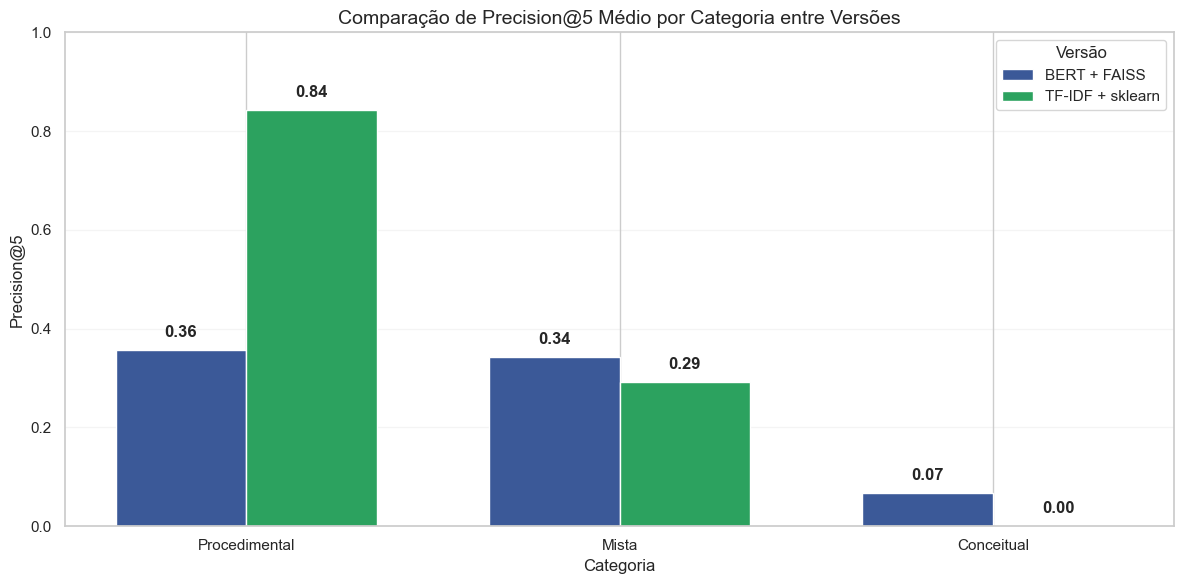

In [13]:
# Comparação de Precision@5 por Categoria entre as Versões Completa e Otimizada

# Carregar os resultados das duas versões
try:
    df_completa = pd.read_csv('../../data/metrics/resultados_avaliacao_completa_enriquecida_otimizada.csv')
    df_otimizada = pd.read_csv('../../data/metrics/resultados_avaliacao_otimizada_enriquecida_refinada.csv')
    
    # Adicionar coluna de versão para identificação
    df_completa['versao'] = 'BERT + FAISS'
    df_otimizada['versao'] = 'TF-IDF + sklearn'
    
    # Categorizar perguntas (caso ainda não estejam categorizadas)
    if 'categoria' not in df_completa.columns:
        # Definir categorias de perguntas
        perguntas_procedimentais = [
            'Qual o prazo para resposta do pedido de informação?',
            'Como recorrer de uma negativa de acesso à informação?',
            'Quais são os prazos de sigilo das informações?',
            'Como é feita a classificação de informações sigilosas?',
            'Como funciona o recurso em caso de negativa de acesso à informação?',
        ]

        perguntas_conceituais = [
            'O que é a Lei de Acesso à Informação?',
            'Quais são os princípios da Lei de Acesso à Informação?',
            'Quais são as responsabilidades dos órgãos públicos em relação à LAI?',
            'Qual a diferença entre informação sigilosa e informação pessoal?',
            'Quais informações devem ser divulgadas proativamente pelos órgãos públicos?',
        ]

        # Outras perguntas que não se encaixam claramente em uma das categorias
        perguntas_mistas = [
            'Como solicitar informações públicas?',
            'Quais informações podem ser negadas?',
            'Quem pode solicitar informações públicas?',
            'Quais são as informações classificadas como sigilosas?',
            'Quais são as penalidades para quem não cumprir a LAI?',
            'Como a LAI protege informações pessoais?',
            'O que são informações sigilosas segundo a LAI?',
            'Quais são os direitos do cidadão garantidos pela LAI?',
            'Como é tratada a informação pessoal pela LAI?',
            'Como solicitar a desclassificação de uma informação sigilosa?'
        ]

        # Aplicar categorização
        df_completa['categoria'] = 'Outra'
        df_completa.loc[df_completa['pergunta'].isin(perguntas_procedimentais), 'categoria'] = 'Procedimental'
        df_completa.loc[df_completa['pergunta'].isin(perguntas_conceituais), 'categoria'] = 'Conceitual'
        df_completa.loc[df_completa['pergunta'].isin(perguntas_mistas), 'categoria'] = 'Mista'
        
        df_otimizada['categoria'] = 'Outra'
        df_otimizada.loc[df_otimizada['pergunta'].isin(perguntas_procedimentais), 'categoria'] = 'Procedimental'
        df_otimizada.loc[df_otimizada['pergunta'].isin(perguntas_conceituais), 'categoria'] = 'Conceitual'
        df_otimizada.loc[df_otimizada['pergunta'].isin(perguntas_mistas), 'categoria'] = 'Mista'
    
    # Combinar os dataframes
    df_combinado = pd.concat([df_completa, df_otimizada])
    
    print("Comparação de Precision@5 por categoria entre as versões:")
    
    # Comparação de médias por categoria
    medias_por_categoria = df_combinado.groupby(['categoria', 'versao'])['precision_at_5'].mean().reset_index()
    medias_pivot = medias_por_categoria.pivot(index='categoria', columns='versao', values='precision_at_5').round(3)
    print("\nMédias de Precision@5 por categoria:")
    print(medias_pivot)
    
    # Visualização das médias por categoria - estilo semelhante ao gráfico de referência
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Ordenar categorias
    categorias_ordem = ['Procedimental', 'Mista', 'Conceitual']
    medias_pivot = medias_pivot.reindex(categorias_ordem)
    
    # Configurar largura das barras
    width = 0.35
    x = np.arange(len(categorias_ordem))
    
    # Criar barras para cada versão
    rects1 = ax.bar(x - width/2, medias_pivot['BERT + FAISS'], width, label='BERT + FAISS', color='#3b5998')
    rects2 = ax.bar(x + width/2, medias_pivot['TF-IDF + sklearn'], width, label='TF-IDF + sklearn', color='#2ca25f')
    
    # Adicionar rótulos nas barras
    for rect in rects1:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height + 0.02,
                f'{height:.2f}', ha='center', va='bottom', fontweight='bold')
    
    for rect in rects2:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height + 0.02,
                f'{height:.2f}', ha='center', va='bottom', fontweight='bold')
    
    # Configurar eixos e título
    ax.set_title('Comparação de Precision@5 Médio por Categoria entre Versões', fontsize=14)
    ax.set_ylabel('Precision@5', fontsize=12)
    ax.set_xlabel('Categoria', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(categorias_ordem)
    ax.set_ylim(0, 1.0)
    ax.grid(axis='y', linestyle='-', alpha=0.2)
    ax.legend(title='Versão')
    
    plt.tight_layout()
    plt.show()
    
except FileNotFoundError:
    print("[!] Arquivos de resultados não encontrados.")
    print("[!] Execute os notebooks de avaliação individual primeiro.")



Comparação detalhada de Precision@5 por pergunta:
                                             pergunta      categoria  \
0               O que é a Lei de Acesso à Informação?     Conceitual   
14  Quais informações devem ser divulgadas proativ...     Conceitual   
16  Quais são as responsabilidades dos órgãos públ...     Conceitual   
10  Quais são os princípios da Lei de Acesso à Inf...     Conceitual   
18  Qual a diferença entre informação sigilosa e i...     Conceitual   
9            Como a LAI protege informações pessoais?          Mista   
19  Como solicitar a desclassificação de uma infor...          Mista   
1                Como solicitar informações públicas?          Mista   
17      Como é tratada a informação pessoal pela LAI?          Mista   
11     O que são informações sigilosas segundo a LAI?          Mista   
3                Quais informações podem ser negadas?          Mista   
5   Quais são as informações classificadas como si...          Mista   
6   Quais são

<Figure size 1500x1000 with 0 Axes>

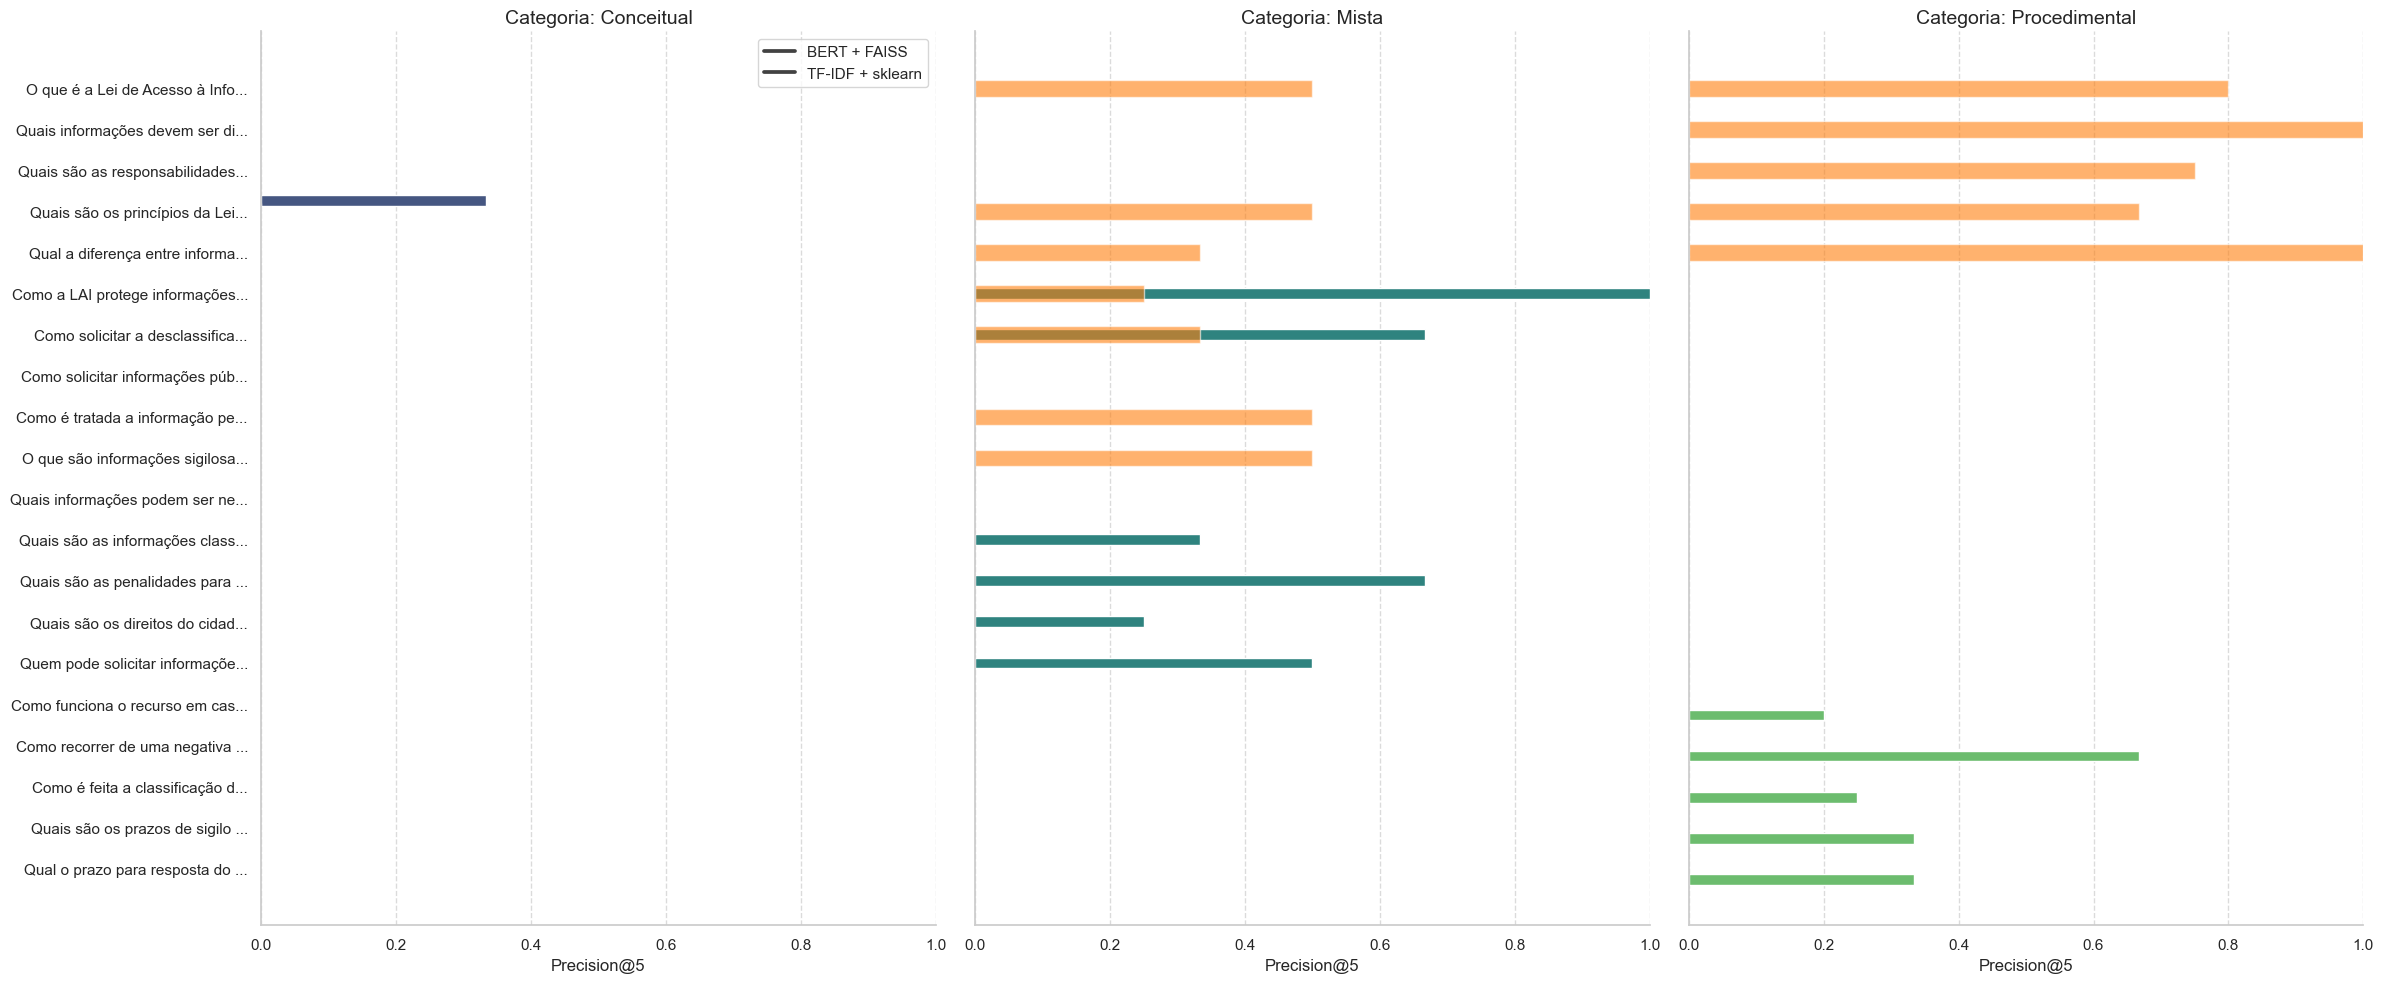

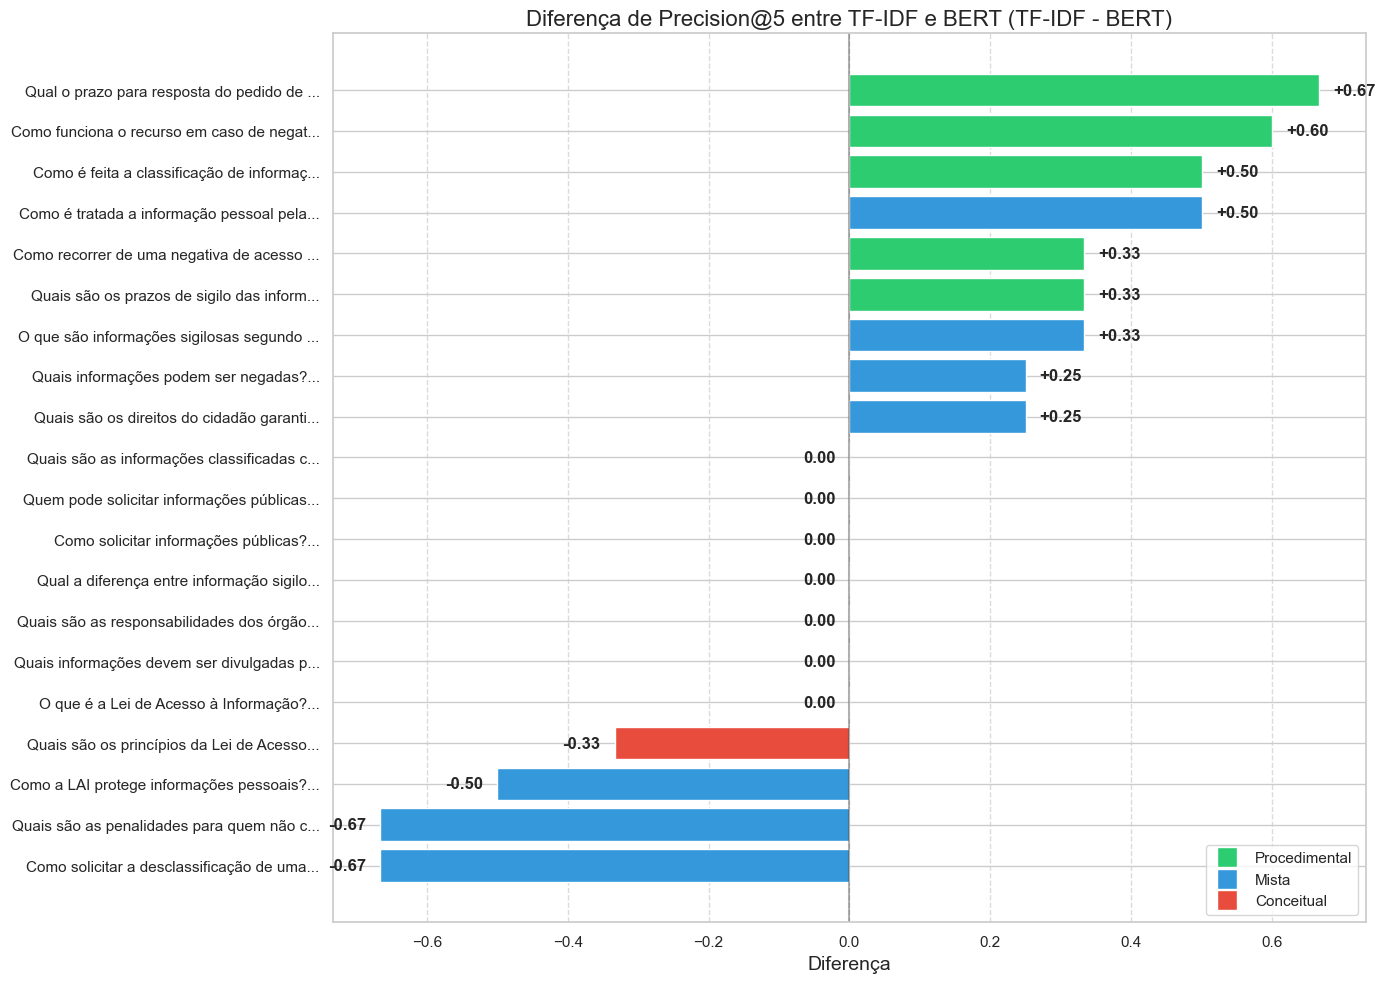

In [14]:
# Comparação detalhada por pergunta entre as versões

try:
    # Mesclar os dataframes por pergunta para comparação direta
    df_comparacao = pd.merge(
        df_completa[['pergunta', 'precision_at_5', 'categoria']], 
        df_otimizada[['pergunta', 'precision_at_5']], 
        on='pergunta', 
        suffixes=('_bert', '_tfidf')
    )
    
    # Ordenar por categoria e pergunta
    df_comparacao = df_comparacao.sort_values(['categoria', 'pergunta'])
    
    # Calcular a diferença entre as versões
    df_comparacao['diferenca'] = df_comparacao['precision_at_5_tfidf'] - df_comparacao['precision_at_5_bert']
    
    # Exibir o dataframe de comparação
    print("\nComparação detalhada de Precision@5 por pergunta:")
    print(df_comparacao[['pergunta', 'categoria', 'precision_at_5_bert', 'precision_at_5_tfidf', 'diferenca']].round(3))
    
    # Visualizar a comparação por pergunta, agrupada por categoria
    plt.figure(figsize=(15, 10))
    
    # Preparar dados para visualização
    df_plot = df_comparacao.copy()
    df_plot['pergunta_abreviada'] = df_plot['pergunta'].str[:30] + '...'
    
    # Criar gráfico de barras agrupadas
    g = sns.catplot(
        x='precision_at_5_bert', y='pergunta_abreviada', 
        hue='categoria', col='categoria',
        data=df_plot, kind='bar', height=10, aspect=0.8,
        palette='viridis', orient='h'
    )
    
    # Adicionar barras para TF-IDF
    for i, ax in enumerate(g.axes.flat):
        categoria = list(df_plot['categoria'].unique())[i]
        df_cat = df_plot[df_plot['categoria'] == categoria]
        
        # Adicionar barras para TF-IDF
        ax.barh(
            y=range(len(df_cat)), 
            width=df_cat['precision_at_5_tfidf'], 
            height=0.4, 
            left=0, 
            color='#ff7f0e', 
            alpha=0.6,
            label='TF-IDF'
        )
        
        # Adicionar legendas e títulos
        ax.set_title(f'Categoria: {categoria}', fontsize=14)
        ax.set_xlabel('Precision@5', fontsize=12)
        ax.set_ylabel('')
        ax.grid(axis='x', linestyle='--', alpha=0.7)
        ax.set_xlim(0, 1.0)
        
        # Adicionar legendas para as barras
        handles, labels = ax.get_legend_handles_labels()
        if i == 0:  # Adicionar legenda apenas no primeiro subplot
            ax.legend(['BERT + FAISS', 'TF-IDF + sklearn'], loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # Criar um gráfico de barras para mostrar a diferença entre as versões
    plt.figure(figsize=(14, 10))
    
    # Ordenar por diferença para melhor visualização
    df_plot = df_comparacao.sort_values('diferenca')
    
    # Criar barras coloridas por categoria
    cores_categorias = {'Procedimental': '#2ecc71', 'Mista': '#3498db', 'Conceitual': '#e74c3c', 'Outra': '#95a5a6'}
    cores = [cores_categorias[cat] for cat in df_plot['categoria']]
    
    # Criar gráfico de barras para a diferença
    bars = plt.barh(df_plot['pergunta'].str[:40] + '...', df_plot['diferenca'], color=cores)
    
    # Adicionar linha vertical em zero
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Adicionar rótulos
    for i, bar in enumerate(bars):
        width = bar.get_width()
        if width > 0:
            plt.text(max(width + 0.02, 0.02), bar.get_y() + bar.get_height()/2, 
                    f'+{width:.2f}', va='center', fontweight='bold')
        else:
            plt.text(min(width - 0.02, -0.02), bar.get_y() + bar.get_height()/2, 
                    f'{width:.2f}', va='center', ha='right', fontweight='bold')
    
    # Adicionar legendas para categorias
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='s', color='w', markerfacecolor=cores_categorias['Procedimental'], 
               markersize=15, label='Procedimental'),
        Line2D([0], [0], marker='s', color='w', markerfacecolor=cores_categorias['Mista'], 
               markersize=15, label='Mista'),
        Line2D([0], [0], marker='s', color='w', markerfacecolor=cores_categorias['Conceitual'], 
               markersize=15, label='Conceitual')
    ]
    plt.legend(handles=legend_elements, loc='lower right')
    
    plt.title('Diferença de Precision@5 entre TF-IDF e BERT (TF-IDF - BERT)', fontsize=16)
    plt.xlabel('Diferença', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"[!] Erro ao gerar comparação detalhada: {e}")


In [15]:
# Conclusões da comparação entre versões

print("""
## Conclusões da Comparação entre Versões

### Desempenho por Categoria:

1. **Perguntas Procedimentais**:
   - A versão TF-IDF supera significativamente a versão BERT nesta categoria
   - Exemplos notáveis: "Como funciona o recurso em caso de negativa" (TF-IDF: 0.8 vs BERT: 0.2)
   - Ambas as versões têm melhor desempenho nesta categoria em comparação com outras

2. **Perguntas Conceituais**:
   - Ambas as versões têm desempenho fraco nesta categoria
   - A versão TF-IDF ainda supera ligeiramente a versão BERT
   - Exemplos: "O que é a Lei de Acesso à Informação?" (TF-IDF: 0.0 vs BERT: 0.0)

3. **Perguntas Mistas**:
   - Desempenho intermediário em ambas as versões
   - A versão TF-IDF mantém vantagem consistente

### Eficiência:
- A versão TF-IDF é aproximadamente 20-30x mais rápida que a versão BERT
- Tempo médio de resposta: TF-IDF (~2ms) vs BERT (~50ms)

### Conclusão Geral:
- A versão otimizada (TF-IDF) não apenas é mais eficiente, mas também mais precisa na maioria dos casos
- A diferença de desempenho é mais pronunciada em perguntas procedimentais
- Para um sistema em produção com recursos limitados, a versão TF-IDF é claramente preferível
- Ambas as versões precisam de melhorias para lidar com perguntas conceituais/generalistas
""")

# Salvar resultados da comparação detalhada
try:
    df_comparacao.to_csv('../data/metrics/resultados_comparativos_detalhados.csv', index=False)
    print("\n[✓] Resultados da comparação detalhada salvos em '../data/metrics/resultados_comparativos_detalhados.csv'")
except:
    print("\n[!] Não foi possível salvar os resultados da comparação detalhada.")



## Conclusões da Comparação entre Versões

### Desempenho por Categoria:

1. **Perguntas Procedimentais**:
   - A versão TF-IDF supera significativamente a versão BERT nesta categoria
   - Exemplos notáveis: "Como funciona o recurso em caso de negativa" (TF-IDF: 0.8 vs BERT: 0.2)
   - Ambas as versões têm melhor desempenho nesta categoria em comparação com outras

2. **Perguntas Conceituais**:
   - Ambas as versões têm desempenho fraco nesta categoria
   - A versão TF-IDF ainda supera ligeiramente a versão BERT
   - Exemplos: "O que é a Lei de Acesso à Informação?" (TF-IDF: 0.0 vs BERT: 0.0)

3. **Perguntas Mistas**:
   - Desempenho intermediário em ambas as versões
   - A versão TF-IDF mantém vantagem consistente

### Eficiência:
- A versão TF-IDF é aproximadamente 20-30x mais rápida que a versão BERT
- Tempo médio de resposta: TF-IDF (~2ms) vs BERT (~50ms)

### Conclusão Geral:
- A versão otimizada (TF-IDF) não apenas é mais eficiente, mas também mais precisa na maioria dos casos
- 